# COVID-19 Cases per Mio

In [8]:
import pandas as pd

# Source and countries
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
countries = ['Switzerland', 'United_States_of_America', 
             'Germany', 'Sweden']

### Fetch

In [9]:
# Fetch data
df0 = pd.read_csv(url)
df0.head()

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
0,11/01/2021,2021-01,675,71,Afghanistan,AF,AFG,38041757.0,Asia,4.15
1,04/01/2021,2020-53,902,60,Afghanistan,AF,AFG,38041757.0,Asia,7.61
2,28/12/2020,2020-52,1994,88,Afghanistan,AF,AFG,38041757.0,Asia,7.19
3,21/12/2020,2020-51,740,111,Afghanistan,AF,AFG,38041757.0,Asia,6.56
4,14/12/2020,2020-50,1757,71,Afghanistan,AF,AFG,38041757.0,Asia,9.01


### Prepare

In [83]:
# Prepare data
df = df0.copy()
df['Date'] = pd.to_datetime(df.dateRep, format='%d/%m/%Y')
df['Deaths'] = df.deaths_weekly / (df.popData2019 / 1e6)
df.rename(columns={'countriesAndTerritories': 'Country'}, inplace=True)
df = df.loc[(df.Country.isin(countries)) & (df.Date >= '2020-03-01'),
            ['Country', 'Date', 'Deaths']]
df = df.pivot(index='Date', columns='Country', )
df.columns = df.columns.droplevel()
df.head()

Country,Germany,Sweden,Switzerland,United_States_of_America
Date,,,,
2020-03-02,0.000000,0.000000,0.000000,0.006078
2020-03-09,0.000000,0.000000,0.234068,0.057739
2020-03-16,0.144545,3.518998,1.287374,0.145868
2020-03-23,0.987723,4.300997,5.500597,1.221643
2020-03-30,4.348391,18.572489,23.055694,6.193307


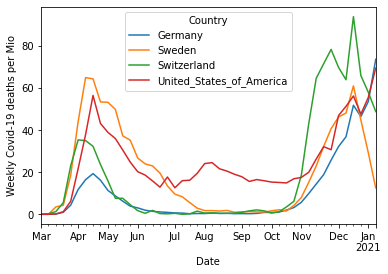

In [68]:
# Plot
ax = df.plot()
ax.set_ylabel('Weekly Covid-19 deaths per Mio');

## All together

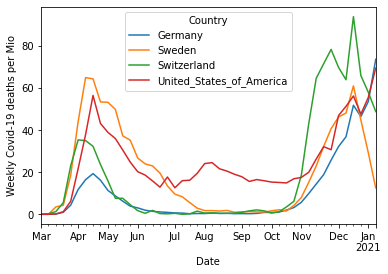

In [82]:
import pandas as pd

# Source and countries
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
countries = ['Switzerland', 'United_States_of_America', 
             'Germany', 'Sweden']

# Fetch data
df0 = pd.read_csv(url)
df0.head()

# Prepare data
df = df0.copy()
df['Date'] = pd.to_datetime(df.dateRep, format='%d/%m/%Y')
df['Deaths'] = df.deaths_weekly / (df.popData2019 / 1e6)
df.rename(columns={'countriesAndTerritories': 'Country'}, inplace=True)
df = df.loc[(df.Country.isin(countries)) & (df.Date >= '2020-03-01'),
            ['Country', 'Date', 'Deaths']]
df = df.pivot(index='Date', columns='Country', )
df.columns = df.columns.droplevel()

# Plot
ax = df.plot()
ax.set_ylabel('Weekly Covid-19 deaths per Mio');

Deaths                                                
Country       Germany     Sweden Switzerland United_States_of_America
Date                                                                 
2020-03-02   0.000000   0.000000    0.000000                 0.006078
2020-03-09   0.000000   0.000000    0.234068                 0.057739
2020-03-16   0.144545   3.518998    1.287374                 0.145868
2020-03-23   0.987723   4.300997    5.500597                 1.221643
2020-03-30   4.348391  18.572489   23.055694                 6.193307
2020-04-06  11.792451  44.085224   35.344262                21.691768
2020-04-13  16.441977  64.905962   34.993160                37.867908
2020-04-20  19.332874  64.319462   32.301378                56.444790
2020-04-27  16.213114  53.371469   23.640864                43.134346
2020-05-04  11.346771  53.175969   15.916621                38.916333
2020-05-11   8.732918  49.852471    7.607209                35.998976
2020-05-18   6.239520  37.242728    7.607209                30.492464
2020-05-25   3.878620  35.189979    4.564325                24.791461
2020-06-01   3.059533  26.783484    1.755510                20.248284
2020-06-08   1.963401  23.948736    0.468136                18.631582
2020-06-15   1.409312  22.971237    1.872544                15.857054
2020-06-22   1.132268  19.549989    0.351102                12.894112
2020-06-29   0.915451  13.489492    0.234068                17.713830
2020-07-06   0.662497   9.579494    0.468136                12.590221
2020-07-13   0.578179   8.308745    0.000000                15.978610
2020-07-20   0.264999   5.571747    0.234068                16.194373
2020-07-27   0.385453   2.932498    1.521442                19.452089
2020-08-03   0.361362   1.759499    0.585170                24.083394
2020-08-10   0.590225   1.759499    0.702204                24.548348
2020-08-17   0.421589   1.563999    0.468136                21.618835
2020-08-24   0.481816   1.857249    0.468136                20.524826
2020-08-31   0.313181   0.977499    0.585170                19.032719
2020-09-07   0.325226   1.172999    0.936272                17.844503
2020-09-14   0.301135   1.270749    1.638476                15.613940
2020-09-21   0.433635   1.172999    2.106612                16.501303
2020-09-28   0.891360   1.075249    1.638476                15.945182
2020-10-05   0.891360   1.661749    0.585170                15.310049
2020-10-12   1.047950   2.150499    1.170340                15.124675
2020-10-19   2.023628   1.563999    3.511019                14.899796
2020-10-26   3.216123   4.203248    6.202801                16.884206
2020-11-02   5.709522   8.015495   18.608403                17.522378
2020-11-09   9.901322  15.248991   43.185539                19.983899
2020-11-16  14.394258  22.971237   64.602757                26.262295
2020-11-23  18.851058  32.257481   71.507762                32.115244
2020-11-30  25.728984  40.663976   78.295732                30.665682
2020-12-07  32.173275  46.235723   69.752252                46.911716
2020-12-14  36.810756  48.092972   63.900553                51.257363
2020-12-21  51.795239  60.995964   93.861252                56.198638
2020-12-28  46.386853  44.769474   65.890131                47.577238
2021-01-04  53.577959  29.227233   57.931820                55.502726
2021-01-11  73.621512  12.511993   48.803170                69.445264